## 標本の統計量の性質
サンプリングは通常1回しかできませんが、シミュレーションを行うことで何回も行える場合があります。
pymc3のサンプリングの意味を理解していきましょう。

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

In [2]:
# 今回の分析で利用するデータ群
population = stats.norm(loc = 4, scale = 0.8)

In [4]:
sample_mean_array = np.zeros(10000)
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [5]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [6]:
sp.mean(sample_mean_array)

4.004

In [7]:
sp.std(sample_mean_array, ddof = 1)

0.251

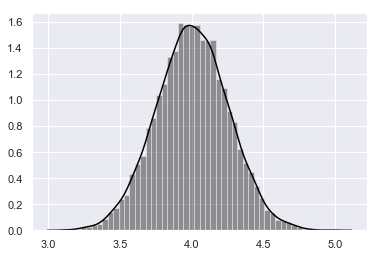

In [8]:
sns.distplot(sample_mean_array, color = 'black')

- 対象
    - 標本平均
- 変化させるもの
    - サンプルサイズ
- 調べたいこと
    - サンプルサイズが大きくなると、標本平均は母平均に近づいていく

In [10]:
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [11]:
sample_mean_array_size = np.zeros(len(size_array))

In [13]:
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

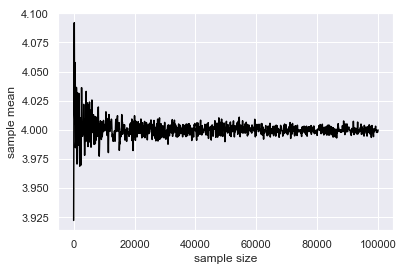

In [14]:
plt.plot(size_array, sample_mean_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [15]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0,n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [16]:
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004

サンプルサイズを10,20,30と変化させていった時の標本平均の分布をヴァイオリンプロットで確認します。
試行回数は各々10000とします。

In [18]:
np.random.seed(1)
#サンプルサイズ10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size":np.tile("size_10", 10000)
})

#サンプルサイズ20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size":np.tile("size_20", 10000)
})

#サンプルサイズ30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size":np.tile("size_30", 10000)
})

#結合
sim_result = pd.concat(
[size_10_df,size_20_df,size_30_df])

#結果の表示
print(sim_result.head())

   sample_mean     size
0     3.922287  size_10
1     3.864329  size_10
2     4.069530  size_10
3     3.857140  size_10
4     4.184654  size_10


このデータを使ってヴァイオリンプロットを作成

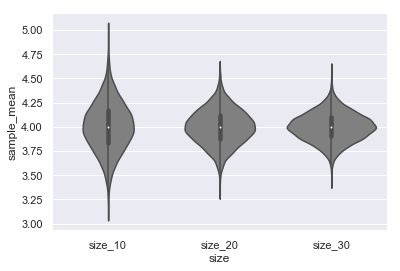

In [19]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color = 'gray')